# Ovrlpy applied to vizgen receptor data map



#### Imports:

In [1]:
%load_ext autoreload
%autoreload 2

#### Parameter definition:

In [2]:
# from collections import defaultdict

# from sklearn.neighbors import NearestNeighbors
import time

import matplotlib.pyplot as plt
import pandas as pd

perf = time.perf_counter()
perf_ = perf

print(time.perf_counter() - perf)

0.00015784148126840591


In [3]:
n_slice = 2

coordinate_path = f"/dh-projects/ag-ishaque/raw_data/vizgen-merfish/vz-receptor-showcase/Slice{n_slice}/Replicate1/detected_transcripts_S{n_slice}R1.csv"
# analysis/tiesmeys/data/vizgen-merfish/vz-receptor-showcase/Slice1/Replicate1/detected_transcripts_S1R1.csv'

scale = 1  # scaling factor for images/coordinats. We want to end up with cell diameter ~30px (cellpose default)
# model_type='cyto2' # cellpose model name. ['dapi','cyto','cyto2']

In [7]:
# SSAM vector field resolution:

kde_bandwidth = 2.5
# um_per_pixel = 1.5
min_expression = 1.5

# SSAM pandwidth:

# {0:'xenium_mouse_brain',1:'merfish_mouse_brain',2:'merfish_liver'}
dataset = 0

file_root = "/dh-projects/ag-ishaque/analysis/tiesmeys/spot-data-z-axis-incoherence/src"

                  x             y             z
count  4.857446e+07  4.857446e+07  4.857446e+07
mean   4.974312e+03  3.696318e+03  2.848895e+00
std    2.237476e+03  1.730974e+03  1.945607e+00
min    5.302726e+01 -7.666222e+01  0.000000e+00
25%    3.236873e+03  2.256283e+03  1.000000e+00
50%    4.957688e+03  3.638046e+03  3.000000e+00
75%    6.799735e+03  5.120685e+03  4.000000e+00
max    9.692914e+03  7.453246e+03  6.000000e+00


<Axes: xlabel='x', ylabel='y'>

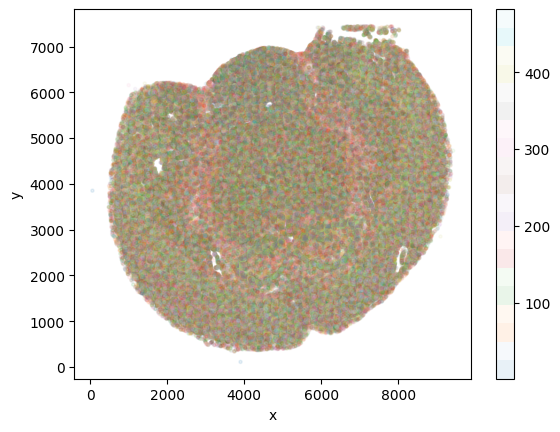

In [6]:
# Load coordinate_path data frame, read only the columns
# global_x, global_y, global_z, fov	gene:

import time

df = pd.read_csv(coordinate_path, sep=",", usecols=[2, 3, 4, 8], header=0)[::1]

print(df.describe())

df.columns = ["x", "y", "z", "gene"]
df = df[~df.gene.str.contains("Blank")]

# df.gene.replace({'Acte1':'Gm498'})

df.gene = df.gene.astype("str").astype("category")
gene_counts = df.gene.value_counts()
genes = list(gene_counts.index)

# Adhere to ovrlpy tutorial's global naming convention:
coordinate_df = df.copy()
del df

coordinate_df.head()

df[::200].plot.scatter(
    x="x", y="y", s=5, c=df[::200].gene.cat.codes, cmap="tab20", alpha=0.1
)
plt.gca().set_aspect("equal")

In [6]:
# pd.to_parquet(f"./publication/vizgen-receptor/coordinates-Slice{n_slice}.parquet", df)

In [11]:
signatures_ = pd.read_csv(
    "/dh-projects/ag-ishaque/raw_data/Xenium-benchmark/scRNAseq/trimmed_means.csv",
    index_col=0,
)

signatures_ = (
    signatures_.T.groupby(lambda x: x.split("_")[1].split(" ")[0].split("-")[0])
    .apply(lambda x: x.mean(0))
    .T
)

signatures = pd.DataFrame(index=genes, columns=signatures_.columns)
signatures = signatures.fillna(0)

for gene in genes:
    if gene in signatures_.index:
        signatures.loc[gene] = signatures_.loc[gene]

del signatures_
signatures.columns = signatures.columns.str.replace("/", "-")

/tmp/ipykernel_2649137/2141992781.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  signatures = signatures.fillna(0)
/tmp/ipykernel_2649137/2141992781.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.490744800000002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  signatures.loc[gene] = signatures_.loc[gene]
/tmp/ipykernel_2649137/2141992781.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.663871' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  signatures.loc[gene] = signatures_.loc[gene]
/tmp/ipykernel_2649137/

In [9]:
#

mins = df[["x", "y"]].min()

# df.x-=df.x.min()
# df.y-=df.y.min()

x          y    z    gene
0   56.930107  3851.8510  5.0  Adgre1
1  183.601070  3874.0085  5.0  Adgre1
2   59.750736  3666.5576  5.0  Adgre1
3   93.463020  3573.8591  0.0    Grm4
4   83.457310  3479.3071  0.0  P2yr13

<Figure size 1000x1000 with 0 Axes>

In [17]:
import random

from src import ovrlp

random.seed(42)

integrity, signal, visualizer = ovrlp.compute_coherence_map(
    df=coordinate_df, KDE_bandwidth=kde_bandwidth, n_components=15
)

/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/src/ovrlp.py:100: RuntimeWarning: Mean of empty slice
  elevation_map_ = np.nanmean([elevation_map,np.roll(elevation_map,1,axis=0)],axis=0)/4
/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/src/ovrlp.py:101: RuntimeWarning: Mean of empty slice
  elevation_map_ += np.nanmean([elevation_map,np.roll(elevation_map,1,axis=1)],axis=0)/4
/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/src/ovrlp.py:102: RuntimeWarning: Mean of empty slice
  elevation_map_ += np.nanmean([elevation_map,np.roll(elevation_map,-1,axis=0)],axis=0)/4
/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/src/ovrlp.py:103: RuntimeWarning: Mean of empty slice
  elevation_map_ += np.nanmean([elevation_map,np.roll(elevation_map,-1,axis=1)],axis=0)/4


['Optional', 'ThreadPoolExecutor', 'Union', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', '_sample_expression_2d', '_sample_expression_3d', 'anndata', 'as_completed', 'count_cells_at_localmax', 'np', 'pd', 'plt', 'produce_map', 'produce_map_3d', 'sample_expression', 'tqdm', 'utils']
Analyzing in 3d mode:
determining local maxima:
21 3878 5 2982 0 3
found 36484 local maxima


/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/.conda-env/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


sampling expression:


Xcr1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 483/483 [00:31<00:00, 15.37it/s]
/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/.conda-env/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/.conda-env/lib/python3.12/site-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/.conda-env/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/dh-projects/ag-ishaque/

[   0 1077 2154 3231 4308 5385 6462 7539 8616 9693] [   0 1064 2129 3194 4259 5324 6389 7454]


 11%|█████████████████████████████████▍                                                                                                                                                                                                                                                                           | 7/63 [00:13<01:39,  1.78s/it]/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/src/utils.py:504: RuntimeWarning: invalid value encountered in divide
  patch_cosine_similarity = np.sum(patch_embedding_top*patch_embedding_bottom,axis=1)/(patch_norm_top*patch_norm_bottom)
 19%|█████████████████████████████████████████████████████████▏                                                                                                                                                                                                                                                  | 12/63 [00:46<05:27,  6.42s/it]/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/src/utils.py:504: Run

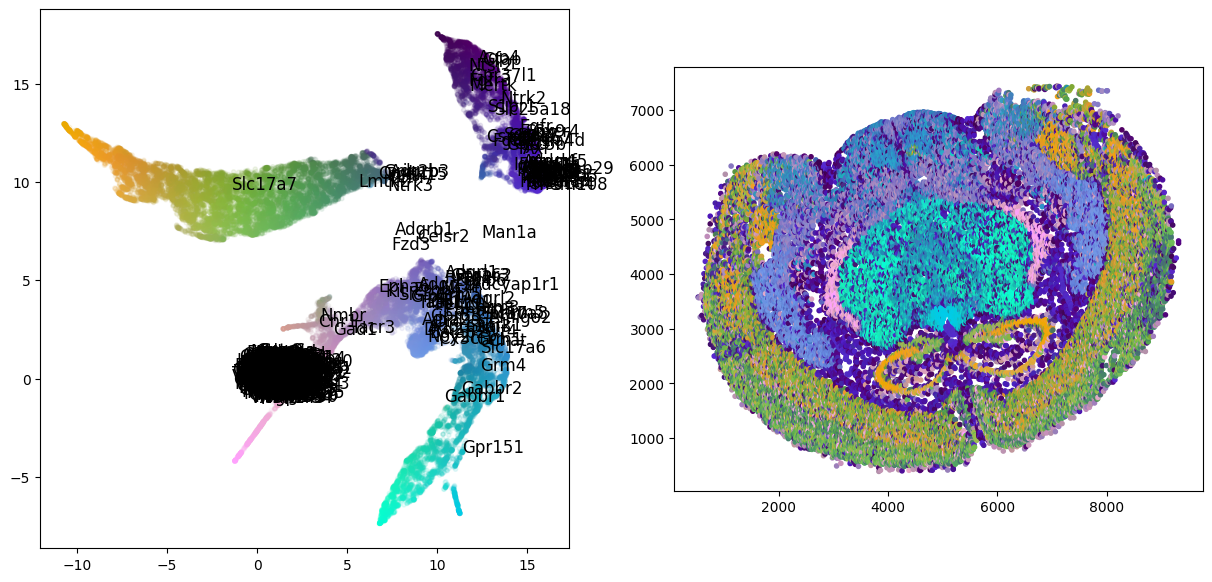

In [18]:
visualizer.plot_fit()

12


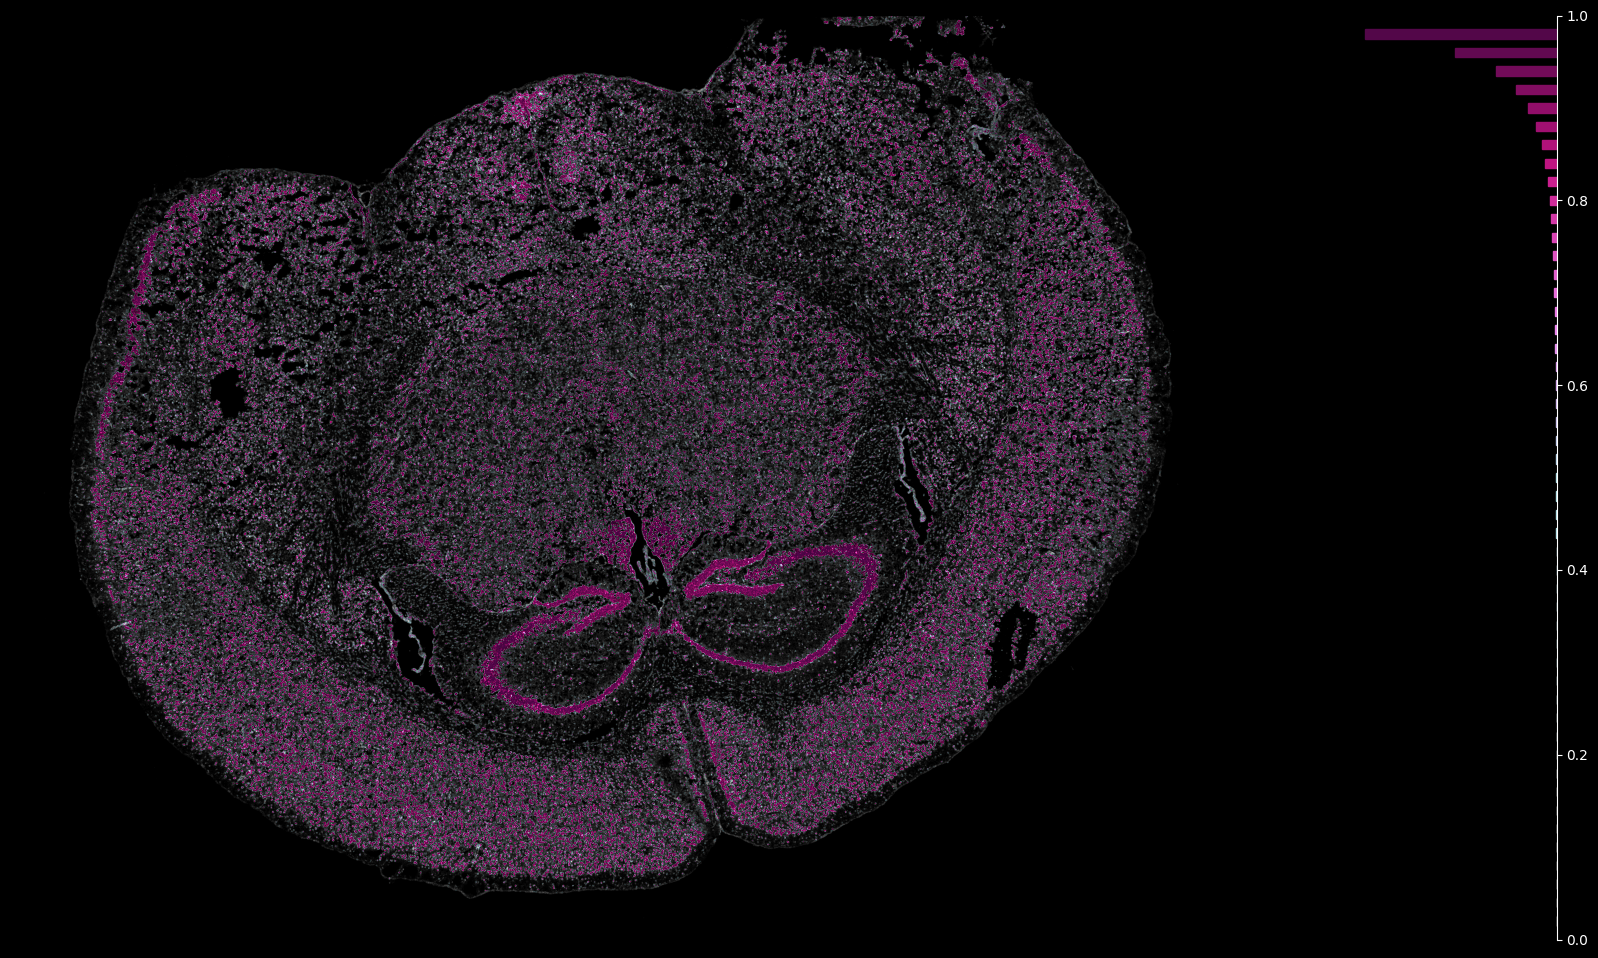

In [19]:
fig, ax = ovrlp.plot_signal_integrity(integrity, signal, signal_threshold=4)

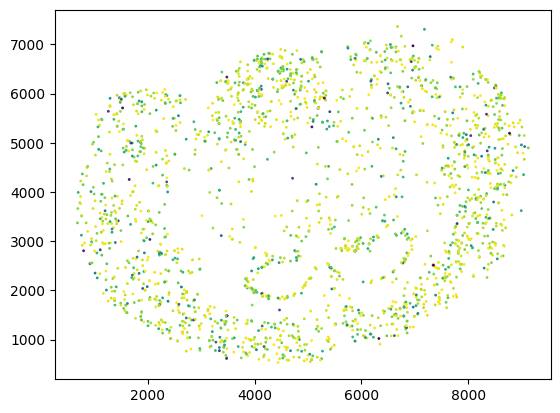

In [20]:
doublet_df = ovrlp.detect_doublets(integrity, signal, signal_cutoff=5)

plt.scatter(doublet_df.x, doublet_df.y, c=doublet_df.integrity, s=1, cmap="viridis_r")

/dh-projects/ag-ishaque/analysis/tiesmeys/src/ovrlpy-dev/.conda-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


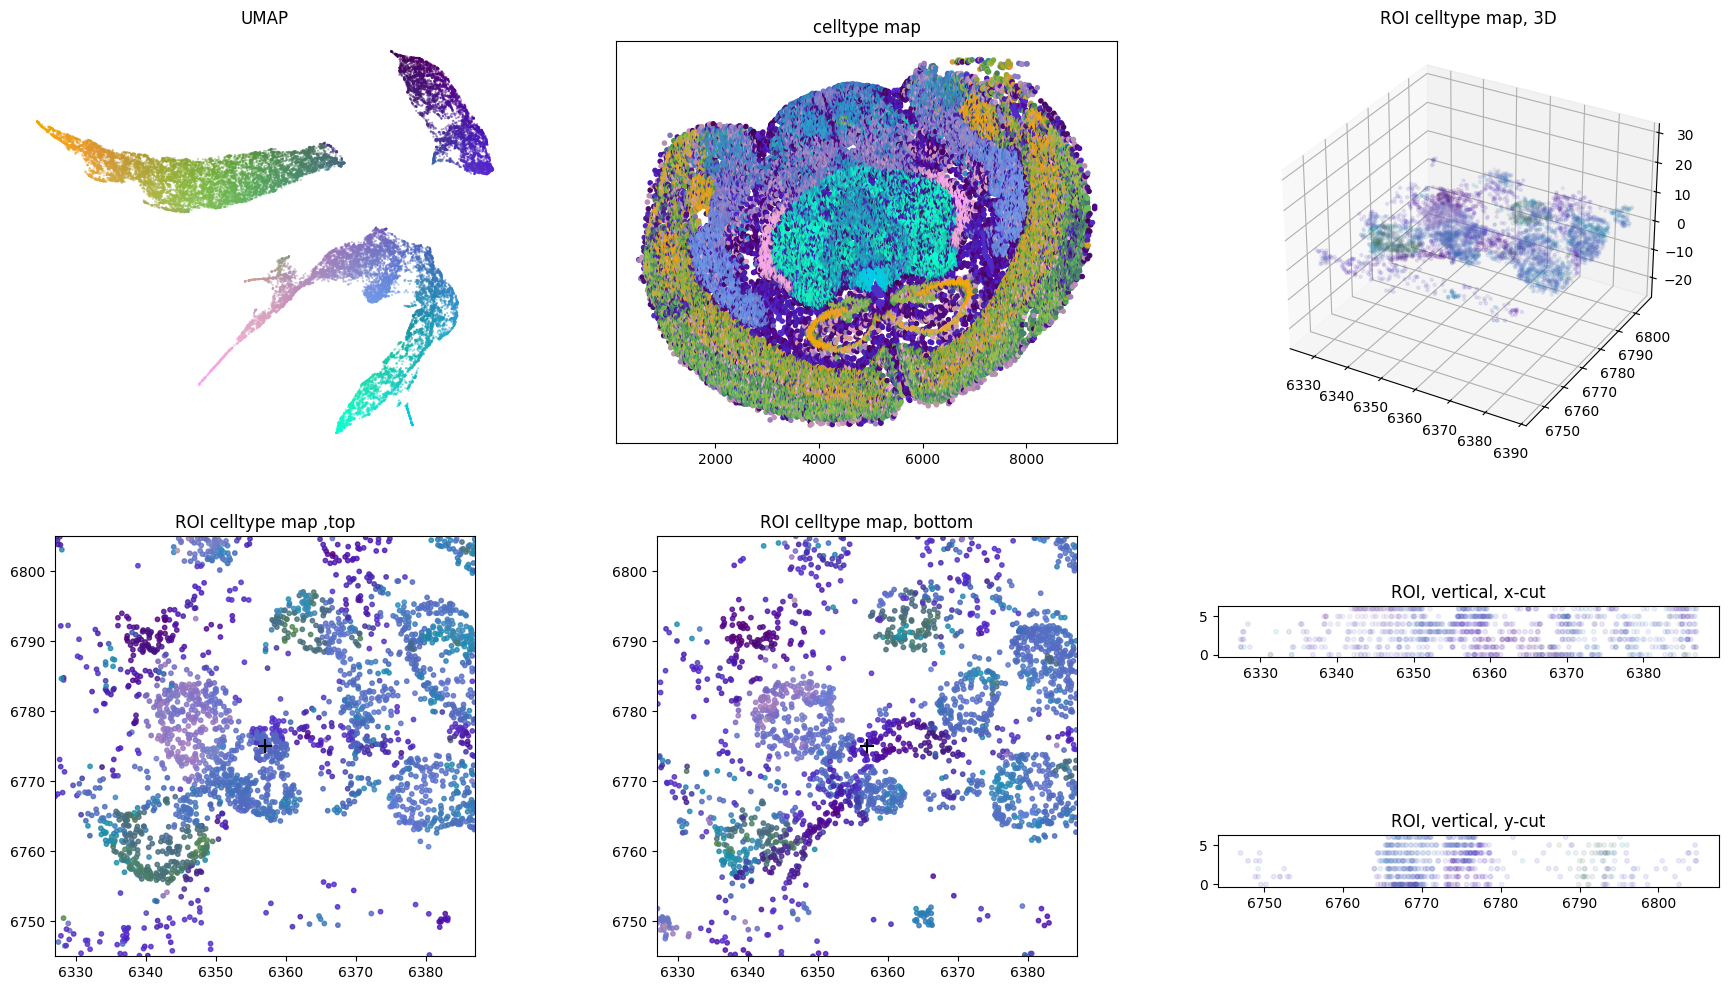

In [21]:
window_size = 30
doublet_case = 1

x, y = doublet_df.loc[doublet_case, ["x", "y"]]

subsample = visualizer.subsample_df(x, y, coordinate_df, window_size=window_size)
subsample_embedding, subsample_embedding_color = visualizer.transform(subsample)

visualizer.plot_instance(
    subsample,
    subsample[["x", "y"]].values,
    subsample_embedding_color,
    x,
    y,
    window_size=window_size,
    rasterized=True,
)

In [24]:
visualizer.pca_2d.components_.shape

(5, 483)